<a href="https://colab.research.google.com/github/TruongThanhNhan20146382/Nhan20146382/blob/main/Foods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data_generator = ImageDataGenerator(rescale=1./255,validation_split=0.1,width_shift_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [4]:
trainset='/content/drive/MyDrive/AI_bt/Foods'

In [5]:
train_dataset=data_generator.flow_from_directory(trainset,
                                     target_size=(100,100),
                                     batch_size=128,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(100,100),
                                              batch_size=128,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)

Found 902 images belonging to 10 classes.
Found 95 images belonging to 10 classes.


In [6]:
{'.ipynb_checkpoints': 0,
 'banh khot': 1,
 'banh mi': 2,
 'banh tet': 3,
 'banh xeo': 4,
 'bun bo hue': 5,
 'bun rieu': 6,
 'com tam': 7,
 'hu tieu': 8,
 'nem chua': 9,
 'pho': 10}

{'.ipynb_checkpoints': 0,
 'banh khot': 1,
 'banh mi': 2,
 'banh tet': 3,
 'banh xeo': 4,
 'bun bo hue': 5,
 'bun rieu': 6,
 'com tam': 7,
 'hu tieu': 8,
 'nem chua': 9,
 'pho': 10}

In [7]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(100,100,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [8]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_dataset,batch_size=128,epochs=50,verbose=1,validation_data=validation_set)

Epoch 1/50
8/8 [==============================] - 298s 35s/step - loss: 3.7490 - accuracy: 0.1308 - val_loss: 2.2749 - val_accuracy: 0.1579
Epoch 2/50
8/8 [==============================] - 21s 3s/step - loss: 2.2750 - accuracy: 0.1563 - val_loss: 2.2577 - val_accuracy: 0.1579
Epoch 3/50
8/8 [==============================] - 20s 2s/step - loss: 2.3266 - accuracy: 0.1552 - val_loss: 2.2744 - val_accuracy: 0.1368
Epoch 4/50
8/8 [==============================] - 21s 3s/step - loss: 2.2871 - accuracy: 0.1286 - val_loss: 2.2771 - val_accuracy: 0.1368
Epoch 5/50
8/8 [==============================] - 19s 2s/step - loss: 2.2879 - accuracy: 0.1208 - val_loss: 2.2766 - val_accuracy: 0.1579
Epoch 6/50
8/8 [==============================] - 20s 3s/step - loss: 2.2847 - accuracy: 0.1519 - val_loss: 2.2622 - val_accuracy: 0.1579
Epoch 7/50
8/8 [==============================] - 20s 2s/step - loss: 2.2734 - accuracy: 0.1497 - val_loss: 2.2780 - val_accuracy: 0.1368
Epoch 8/50
8/8 [================

In [9]:
train_dataset=data_generator.flow_from_directory(trainset,
                                     target_size=(100,100),
                                     batch_size=128,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(100,100),
                                              batch_size=128,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)

Found 902 images belonging to 10 classes.
Found 95 images belonging to 10 classes.


In [10]:
model.save('food.hs')

In [12]:
model1=load_model('food.hs')

In [13]:
label = ['banh khot', 'banh mi', 'banh tet', 'banh xeo', 'bun bo hue', 'bun rieu', 'com tam', 'hu tieu','nem chua', 'pho']

1/1 [==============================] - 0s 124ms/step
banh xeo


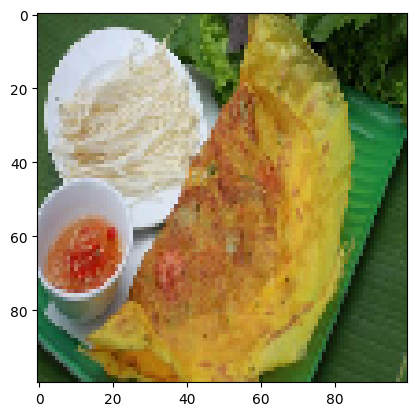

In [15]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/AI_bt/test/foods/banh_xeo (8).jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])

1/1 [==============================] - 0s 21ms/step
bun bo hue


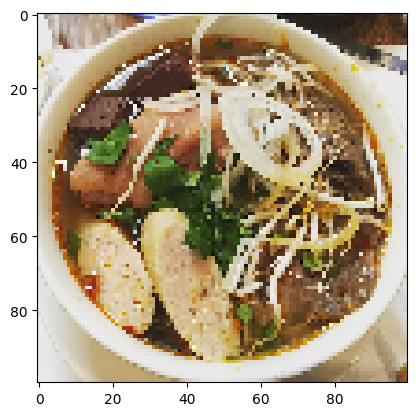

In [19]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/AI_bt/test/foods/bun_bo (4).jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])